<a href="https://colab.research.google.com/github/tannayjanbandhu/OIBSIP/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions  # Requires mlxtend library
import seaborn as sns

In [ ]:
# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Step 4: Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



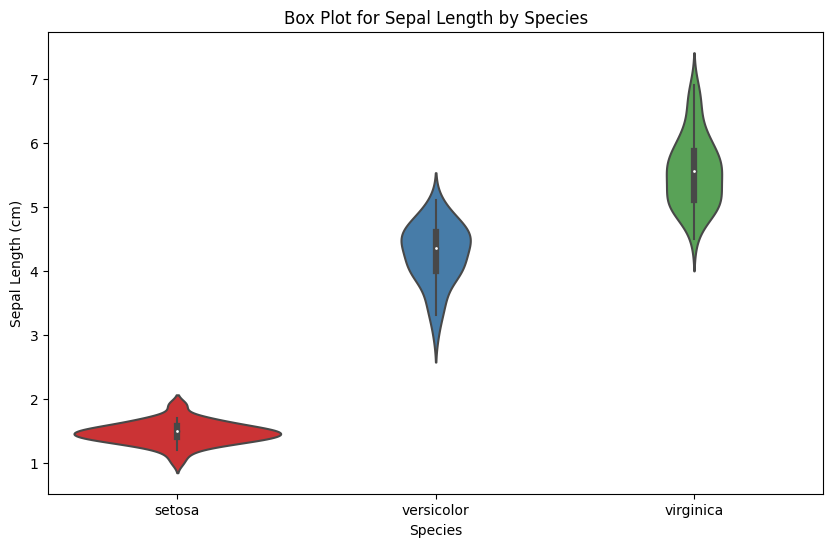

In [ ]:
# Step 6: Visualization 1: Box Plot for Sepal Length by Species
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y=iris.feature_names[2], data=iris_df, palette='Set1')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Box Plot for Sepal Length by Species')
plt.show()

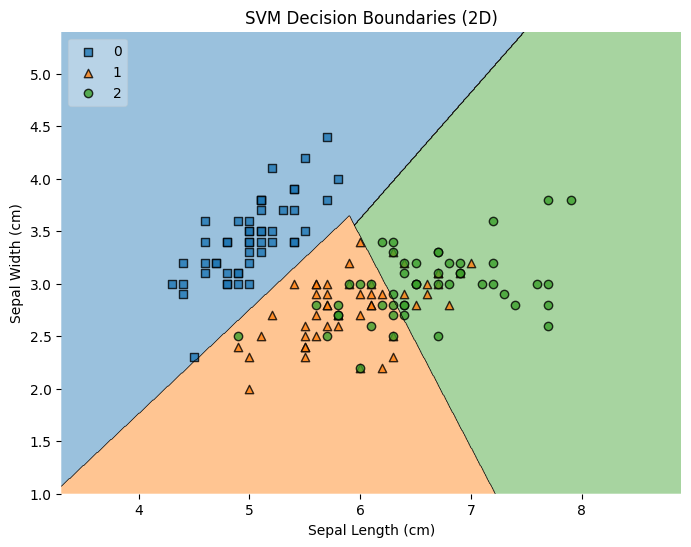

In [ ]:
# Step 7: Visualization 2: Decision boundaries (2D only)
# Select the first two features (for visualization purposes)
X_2D = X[:, :2]
svm_classifier_2D = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier_2D.fit(X_2D, y)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plot_decision_regions(X_2D, y, clf=svm_classifier_2D, legend=2)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundaries (2D)')
plt.show()

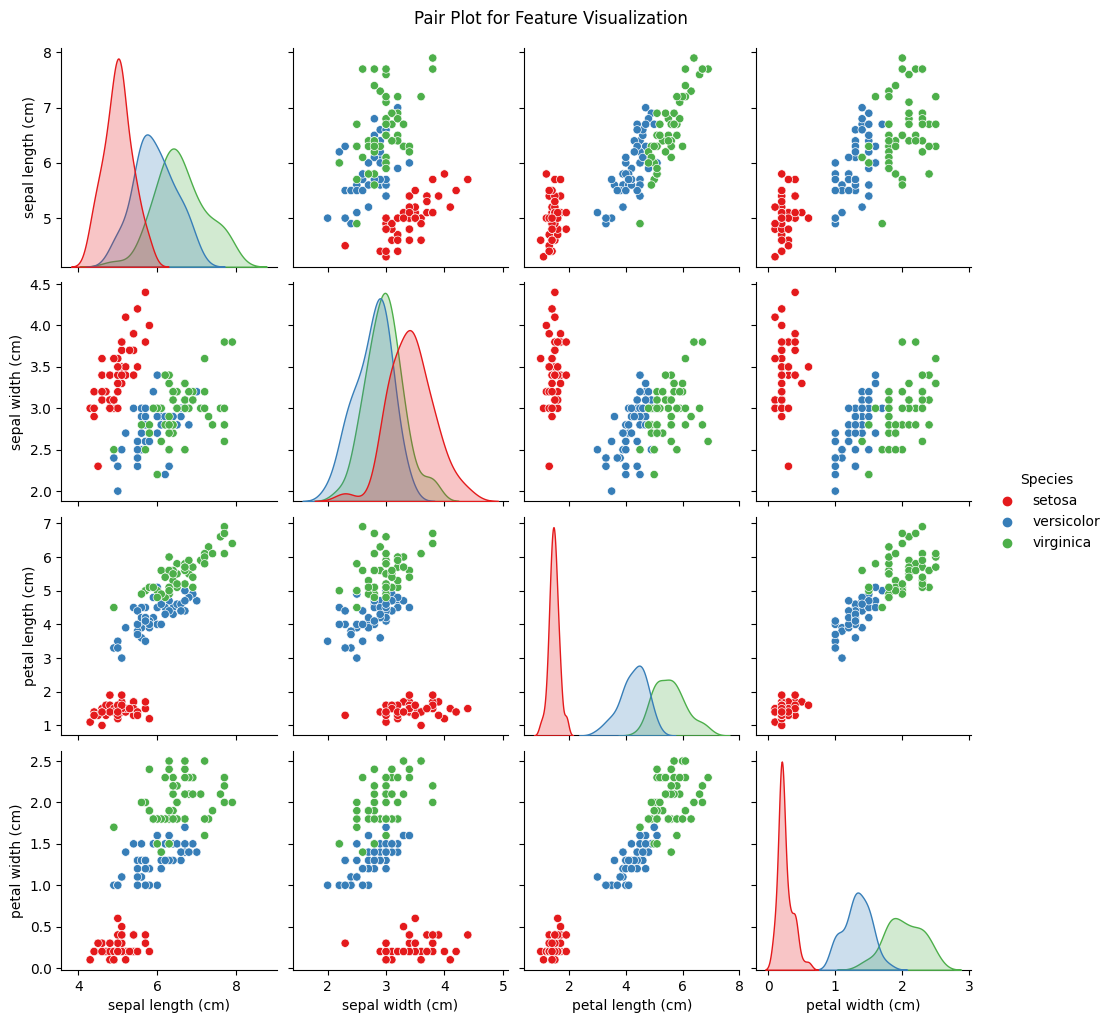

In [ ]:
# Step 8: Visualization 3: Pair Plot for Feature Visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Species'] = iris.target_names[y]
sns.pairplot(iris_df, hue='Species', palette='Set1')
plt.suptitle('Pair Plot for Feature Visualization', y=1.02)
plt.show()